# Movie Rating Prediction

## Table of Content
- **Data collecttion**
- **Data Cleaning**
- **Feature engineering**
- **Machine Learning Model**

In [40]:
# Import necessary libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVR
import plotly.graph_objects as go

#### Data collection - The process of extracting data from data source

In [41]:
# Reading and viewing the movie data

df = pd.read_csv('movies.csv', encoding='latin1')

In [42]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Counting the number of values in the Genre column

df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [44]:
# Checking the Data types

df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [45]:
# Checking the number of columns

df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [46]:
# Checking the statistical value of the data

df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [47]:
# Checking the data shape

df.shape

(15509, 10)

In [48]:
# Removing the Bracket from the Year
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')

In [49]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Removing 'min' from duration column
df['Duration'] = df['Duration'].str.replace(' min', '')

In [51]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Split 'Genre' column into three separate columns
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.split(', ', expand=True)

# Drop the original 'Genre' column
df.drop(columns=['Genre'], inplace=True)

df

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,2021,90,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,2010,105,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,None,None
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None
15506,Zulmi Raj,2005,NaN,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Action,None,None
15507,Zulmi Shikari,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,None,None


In [53]:
# Checking the data types

df.dtypes

Name         object
Year         object
Duration     object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Genre1       object
Genre2       object
Genre3       object
dtype: object

In [54]:
# Checking for null values

df.isnull().sum()

Name            0
Year          528
Duration     8269
Rating       7590
Votes        7589
Director      525
Actor 1      1617
Actor 2      2384
Actor 3      3144
Genre1       1877
Genre2       9308
Genre3      12269
dtype: int64

In [55]:
# Convert 'Year' column to int64
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Calculate the mean excluding missing values
mean_year = df['Year'].mean()

# Replace missing values with the mean
df['Year'] = df['Year'].fillna(mean_year).astype('int64')

df['Year']

0        1987
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: int64

In [56]:
# Convert 'Duration' column to numeric
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Calculate the mean excluding missing values
mean_duration = df['Duration'].mean()

# Replace missing values with the mean
df['Duration'] = df['Duration'].fillna(mean_duration).astype('int64')


df['Duration']

0        128
1        109
2         90
3        110
4        105
        ... 
15504    128
15505    129
15506    128
15507    128
15508    130
Name: Duration, Length: 15509, dtype: int64

In [57]:
# Convert 'Votes' column to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Calculate the mean excluding missing values
mean_votes = df['Votes'].mean()

# Replace missing values with the mean
df['Votes'] = df['Votes'].fillna(mean_votes).astype('int64')


df['Votes']

0        120
1          8
2        120
3         35
4        120
        ... 
15504     11
15505    655
15506    120
15507    120
15508     20
Name: Votes, Length: 15509, dtype: int64

In [58]:
# Calculate the mean excluding missing values
mean_rating = df['Rating'].mean()

# Replace missing values with the mean
df['Rating'].fillna(mean_rating, inplace=True)

df['Rating']

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

In [59]:
# Replace missing values with 'Unknown' for specified columns
columns_to_fill_unknown = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2', 'Genre3']
df[columns_to_fill_unknown] = df[columns_to_fill_unknown].fillna('Unknown')

In [60]:
# Checking for null values

df.isnull().sum()

Name        0
Year        0
Duration    0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

#### Data Analysis - Understanding the data with visualizations

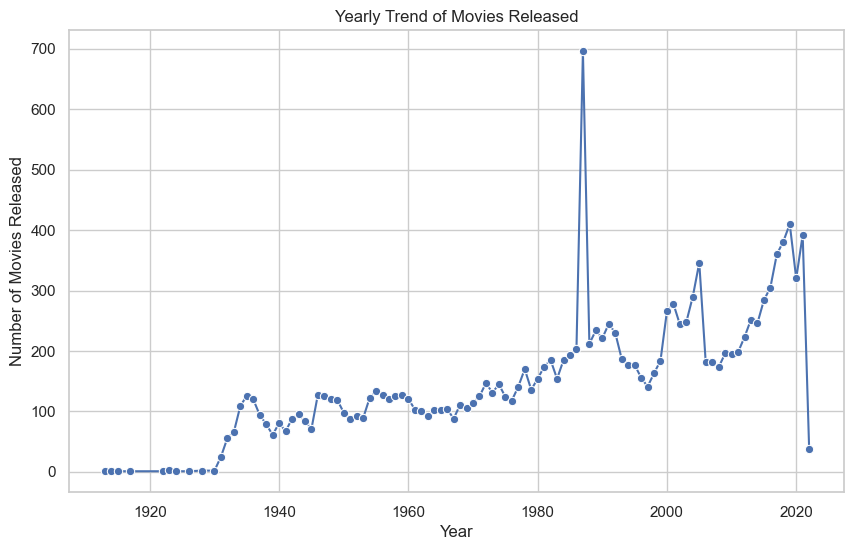

In [61]:
# Yearly Trend Of Movies Released

# Calculate count of movies released each year
yearly_counts = df['Year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Count']
yearly_counts = yearly_counts.sort_values(by='Year')  # Sort by year

# Set the style
sns.set(style="whitegrid")

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts, x='Year', y='Count', marker='o')
plt.title('Yearly Trend of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

# The highest number of movies was produced in the year 1987 with 696 movies


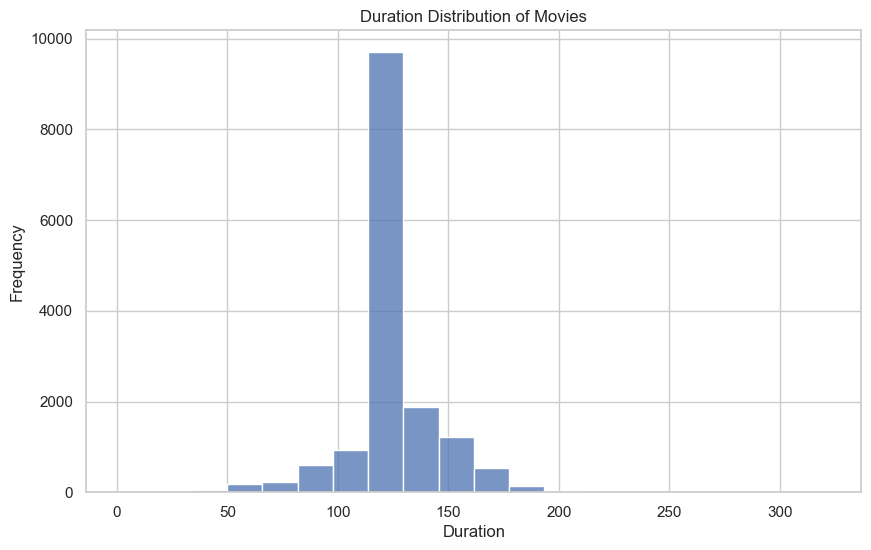

In [62]:
# Duration Distribution Of Movies

# Set the style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=False)
plt.title('Duration Distribution of Movies')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# The most movie duration is between 120-139 mins

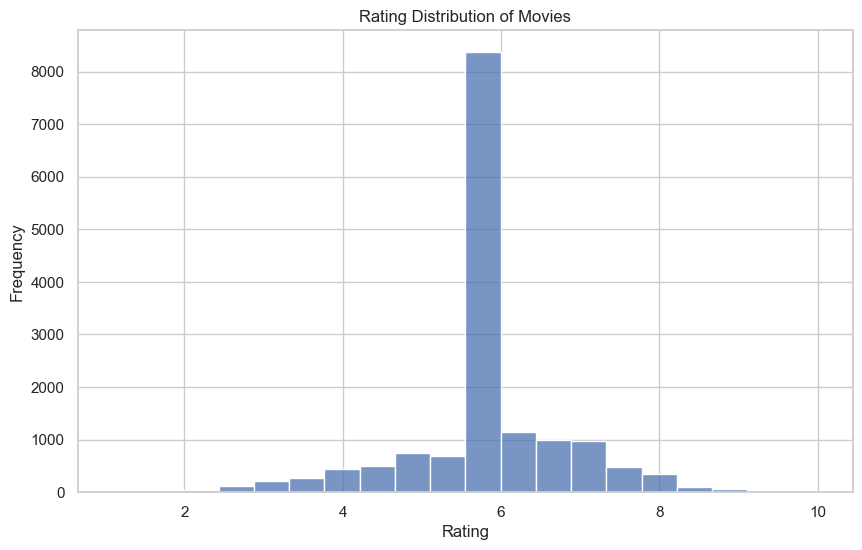

In [63]:
# Rating Distribution Of Movies

# Set the style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=False)
plt.title('Rating Distribution of Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# The most movie rating is between  5.8 and 6.2

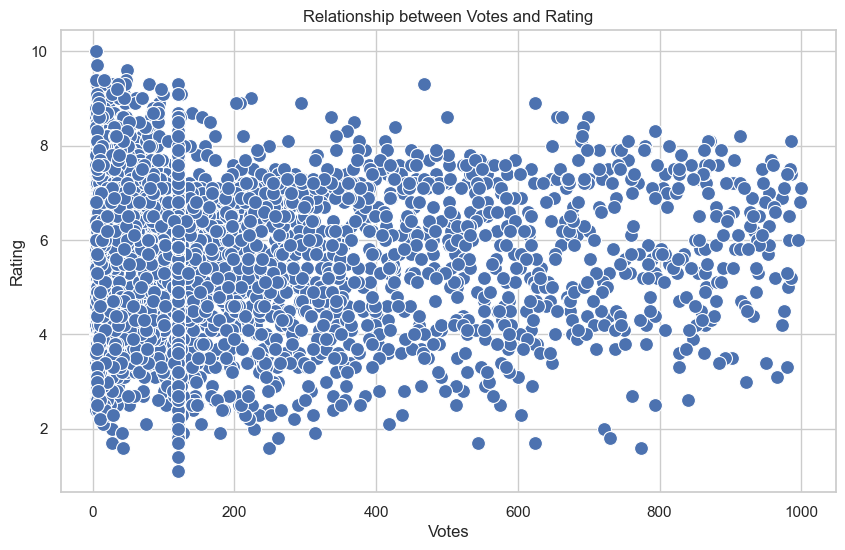

In [64]:
# Relationship between Votes and rating

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Rating', s=100)
plt.title('Relationship between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# This most movie vote is between 0 - 200 and 2 - 10

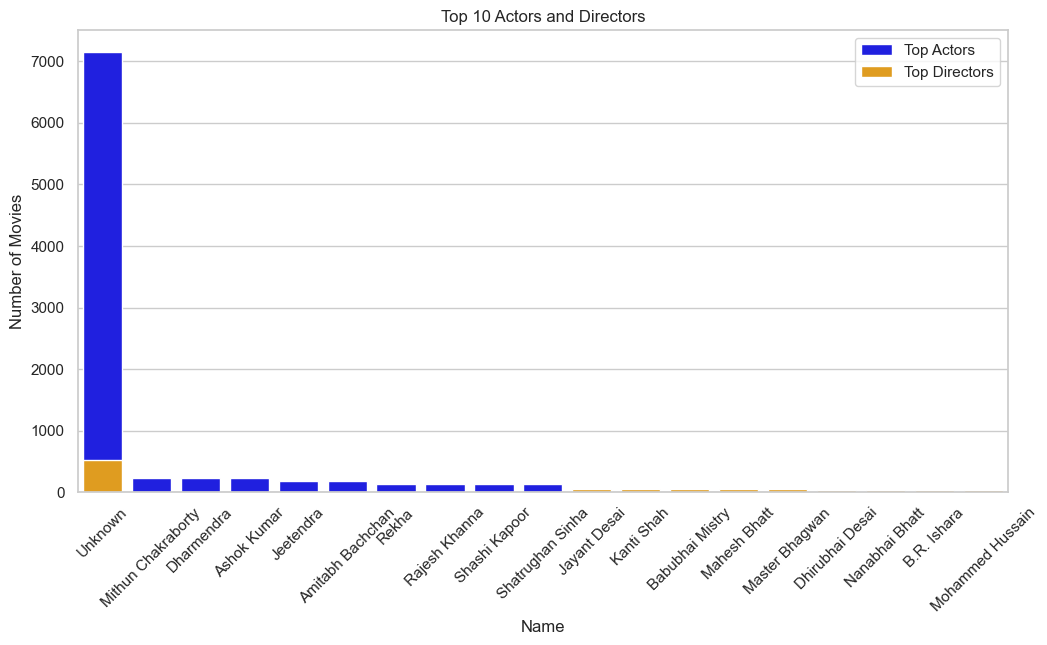

In [65]:
# Top 10 Actors and Directors

# Count occurrences of each actor and director
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
director_counts = df['Director'].value_counts()

# Get top 10 actors and directors
top_n = 10
top_actors = actor_counts.head(top_n)
top_directors = director_counts.head(top_n)

# Create dataframes for top actors and directors
top_actors_df = top_actors.reset_index()
top_actors_df.columns = ['Name', 'Count']
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Name', 'Count']

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_actors_df, x='Name', y='Count', color='blue', label='Top Actors')
sns.barplot(data=top_directors_df, x='Name', y='Count', color='orange', label='Top Directors')
plt.title('Top 10 Actors and Directors')
plt.xlabel('Name')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# The top actos is Mithun Chakraborty with 241 films and Top Director is Jayant Desai with 50 movies

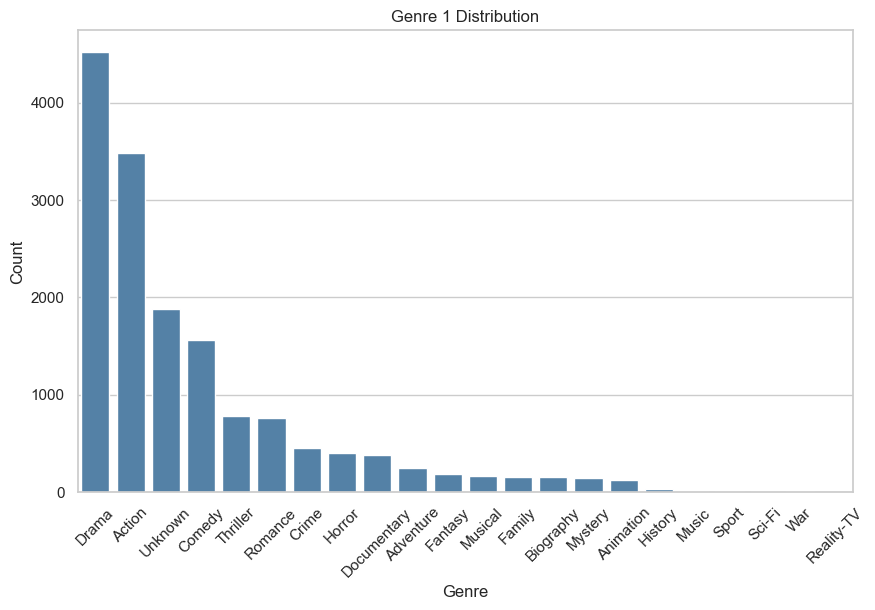

In [66]:
# Genre 1 Distribution - Top Genre is drama with 4,517 movies

# Count occurrences of each genre
genre1_counts = df['Genre1'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=genre1_counts.index, y=genre1_counts.values, color='steelblue')
plt.title('Genre 1 Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

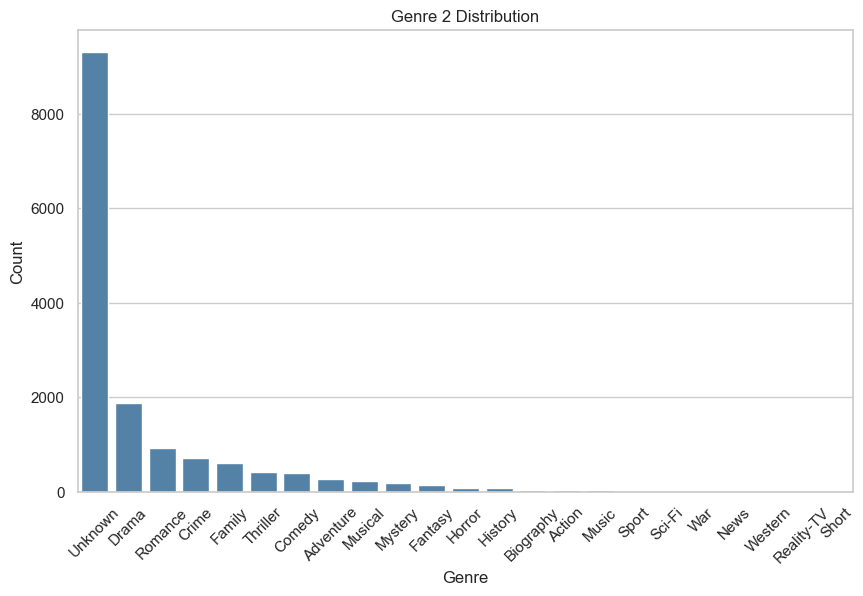

In [67]:
# Genre 2 Distribution - Top Genre is drama with 1,890 movies

# Count occurrences of each genre
genre2_counts = df['Genre2'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=genre2_counts.index, y=genre2_counts.values, color='steelblue')
plt.title('Genre 2 Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

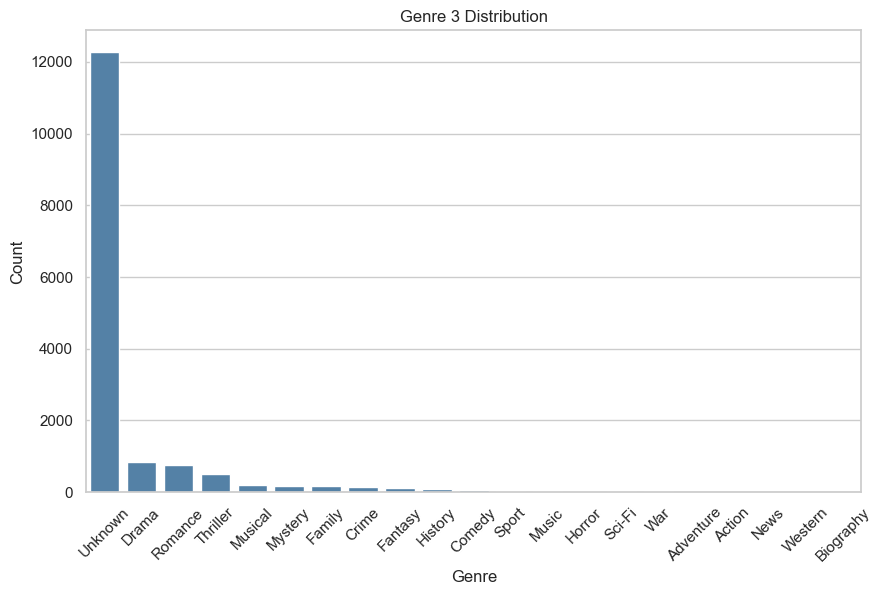

In [68]:
# Genre 3 Distribution - drama is the genre with the most movies 836

# Count occurrences of each genre
genre3_counts = df['Genre3'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=genre3_counts.index, y=genre3_counts.values, color='steelblue')
plt.title('Genre 3 Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

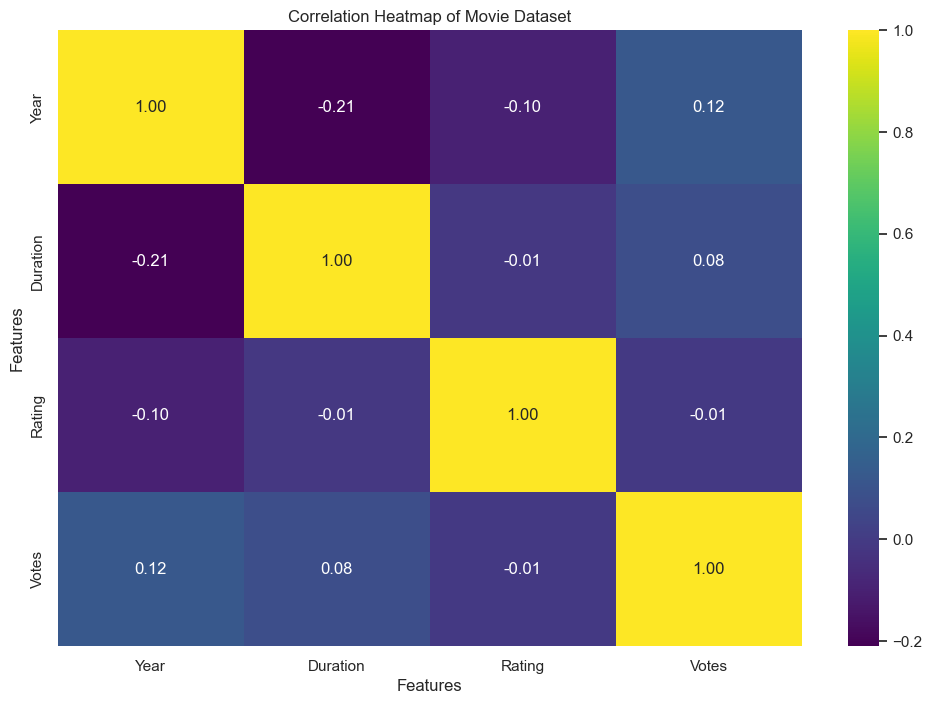

In [69]:
# Checking the correlation between numerical columns 

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Set the style
sns.set(style="white")

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Movie Dataset')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

#### Feature Engineering - The process of selecting the best columns for Machine Learning

In [28]:
# Correlation of columns

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlations
correlations = numeric_columns.corr()['Rating'].abs().sort_values(ascending=False)

print(correlations)

Rating      1.000000
Year        0.097563
Duration    0.014700
Votes       0.008457
Name: Rating, dtype: float64


In [29]:
# Drop columns "Name" and "Votes"
df = df.drop(columns=['Name', 'Votes'])

In [30]:
df

,Year,Duration,Rating,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,1987,128,5.841621,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Unknown,Unknown
1,2019,109,7.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Unknown,Unknown
2,2021,90,5.841621,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,Unknown
3,2019,110,4.400000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Unknown
4,2010,105,5.841621,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
15504,1988,128,4.600000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Unknown,Unknown
15505,1999,129,4.500000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,Unknown
15506,2005,128,5.841621,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,Action,Unknown,Unknown
15507,1988,128,5.841621,Unknown,Unknown,Unknown,Unknown,Action,Unknown,Unknown


In [31]:
# Convert "Rating" column to float with two decimal places
df['Rating'] = df['Rating'].round(2)

In [32]:
df

,Year,Duration,Rating,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,1987,128,5.84,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,Unknown,Unknown
1,2019,109,7.00,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Unknown,Unknown
2,2021,90,5.84,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,Unknown
3,2019,110,4.40,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Unknown
4,2010,105,5.84,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
15504,1988,128,4.60,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Action,Unknown,Unknown
15505,1999,129,4.50,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,Unknown
15506,2005,128,5.84,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown,Action,Unknown,Unknown
15507,1988,128,5.84,Unknown,Unknown,Unknown,Unknown,Action,Unknown,Unknown


In [35]:
# Encoding the categorical columns to numerical values for Machine Learning

# List of categorical columns
categorical_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre1', 'Genre2', 'Genre3']

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

In [36]:
df

,Year,Duration,Rating,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,1987,128,5.84,1031,1392,4672,2345,19,13,10
1,2019,109,7.00,611,2536,4214,4297,19,13,10
2,2021,90,5.84,4584,3017,2075,2725,19,3,10
3,2019,110,4.40,2579,2132,563,3359,16,7,10
4,2010,105,5.84,3168,2350,2738,3391,19,13,10
...,...,...,...,...,...,...,...,...,...,...
15504,1988,128,4.60,1880,1764,3667,3627,0,13,10
15505,1999,129,4.50,1667,1413,3927,4288,0,18,10
15506,2005,128,5.84,1585,2901,3955,3870,0,13,10
15507,1988,128,5.84,5056,3766,3955,3870,0,13,10


In [37]:
# Train test split for Machine Learning

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Rating'])
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.914865748206506
R-squared: 0.04943141346963542


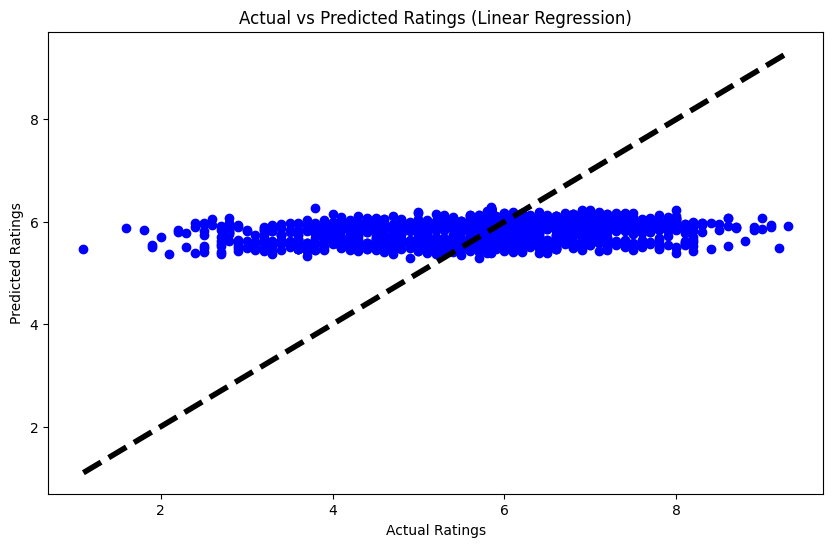

In [38]:
# Using regression model

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predicted vs actual ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.show()

Mean Squared Error: 1.7216186689590944
R-squared: -0.7888052185852901


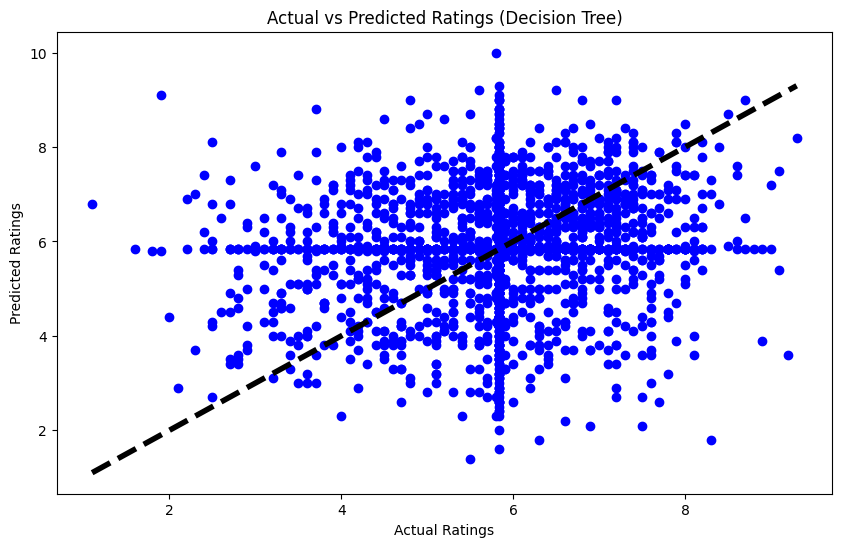

In [39]:
# Using decision tree model

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predicted vs actual ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Decision Tree)')
plt.show()

Mean Squared Error: 0.8266705725535514
R-squared: 0.14106842537392494


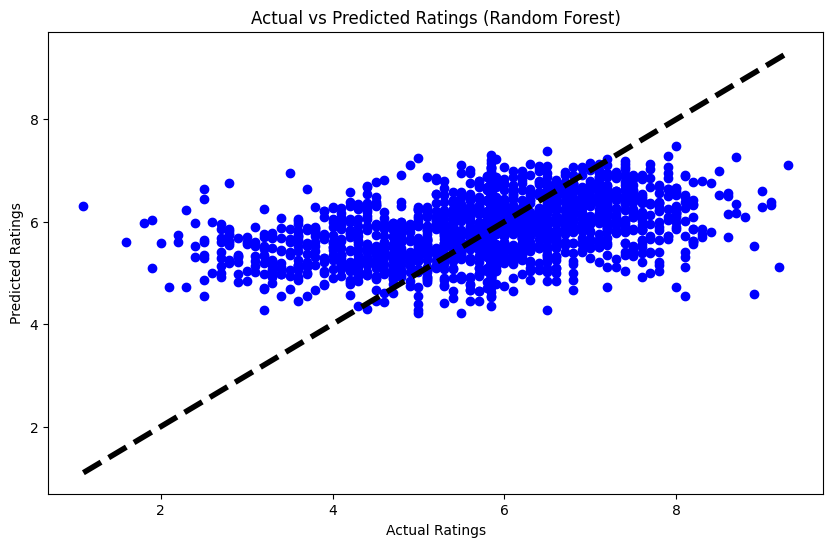

In [40]:
# Using Random Forest model

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predicted vs actual ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.show()

#### The most preferred model to use is Random Forest because the squared difference between the actual and predicted values is relatively moderate than the other models